[1e-05, 0.0001, 0.001, 0.01, 0.01668101, 0.02782559, 0.04641589, 0.07742637, 0.1, 0.12915497, 0.21544347, 0.35938137, 0.59948425, 1, 10, 100, 1000]


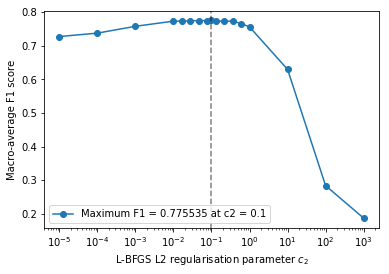

In [6]:
######################################################################
# Extracting chemical-disease associations from the biological literature
# R214: Main Practical
# Jan Ondras (jo356), Trinity College
######################################################################
# Plot results from hyperparameter tuning of L-BFGS's parameter c2 
######################################################################

import numpy as np
import matplotlib.pyplot as plt
import time
import glob
from fuzzywuzzy import process # https://github.com/seatgeek/fuzzywuzzy

# Basic set of parameters
# c2_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
# f1_scores = [
#     0.727621, 
#     0.737764, 
#     0.758100, 
#     0.773423, 
#     0.775535, 
#     0.756366, 
#     0.629842, 
#     0.283873, 
#     0.187263, 
#     0.187263
# ]

# Extended set of parameters
c2_range = [0.00001, 0.0001, 0.001, 0.01, 
                0.01668101,  0.02782559,  0.04641589,  0.07742637, 
            0.1, 
                0.12915497,  0.21544347,  0.35938137,  0.59948425, 
            1, 10, 100, 1000,
           #10000
           ]

f1_scores = [
    0.727621, 
    0.737764, 
    0.758100, 
    0.773423, 
        0.773657, 
        0.774520, 
        0.774975, 
        0.775052, 
    0.775535, 
        0.774476, 
        0.773005, 
        0.773796, 
        0.766336, 
    0.756366, 
    0.629842, 
    0.283873, 
    0.187263, 
#    0.187263
]
print c2_range

plt.figure()
# plt.figure(figsize=(13,6))
plt.plot(c2_range, f1_scores, 'o-')
plt.legend(['Maximum F1 = {:.6f} at c2 = {:.1f}'.format(np.max(f1_scores), c2_range[np.argmax(f1_scores)] )])
plt.xscale('log')
plt.xlabel('L-BFGS L2 regularisation parameter $c_2$')
plt.ylabel('Macro-average F1 score')
plt.axvline(0.1, color='k', linestyle='--', alpha=0.5)
plt.show()


In [12]:
np.logspace(-2, 0, 10)

array([ 0.01      ,  0.01668101,  0.02782559,  0.04641589,  0.07742637,
        0.12915497,  0.21544347,  0.35938137,  0.59948425,  1.        ])

In [1]:
import numpy as np
np.linspace(-2, 0, 10)

array([-2.        , -1.77777778, -1.55555556, -1.33333333, -1.11111111,
       -0.88888889, -0.66666667, -0.44444444, -0.22222222,  0.        ])

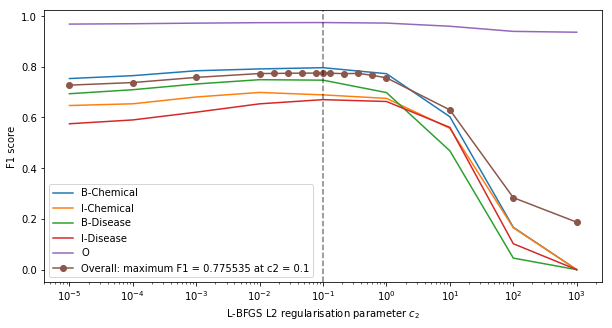

╒═══════════╤══════════════╤══════════════╤═════════════╤═════════════╤════════╤═══════════╕
│   $c_2$   │  B-Chemical  │  I-Chemical  │  B-Disease  │  I-Disease  │   O    │  Overall  │
╞═══════════╪══════════════╪══════════════╪═════════════╪═════════════╪════════╪═══════════╡
│  0.0000   │    0.7536    │    0.6472    │   0.6937    │   0.5753    │ 0.9683 │ 0.727621  │
├───────────┼──────────────┼──────────────┼─────────────┼─────────────┼────────┼───────────┤
│  0.0001   │    0.7650    │    0.6541    │   0.7096    │   0.5904    │ 0.9698 │ 0.737764  │
├───────────┼──────────────┼──────────────┼─────────────┼─────────────┼────────┼───────────┤
│  0.0010   │    0.7843    │    0.6809    │   0.7322    │   0.6210    │ 0.9721 │ 0.758100  │
├───────────┼──────────────┼──────────────┼─────────────┼─────────────┼────────┼───────────┤
│  0.0100   │    0.7915    │    0.6988    │   0.7491    │   0.6539    │ 0.9739 │ 0.773423  │
├───────────┼──────────────┼──────────────┼─────────────┼─────────────

In [30]:
######################################################################
# Print table and plot for the first coarser search
######################################################################

import numpy as np
import matplotlib.pyplot as plt
import time
import glob
from tabulate import tabulate

c2_range = [
    0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 
    #10000
           ]
# Extended set of parameters
c2_range_extended = [0.00001, 0.0001, 0.001, 0.01, 
                0.01668101,  0.02782559,  0.04641589,  0.07742637, 
            0.1, 
                0.12915497,  0.21544347,  0.35938137,  0.59948425, 
            1, 10, 100, 1000,
           #10000
           ]

f1_scores_extended = [
    0.727621, 
    0.737764, 
    0.758100, 
    0.773423, 
        0.773657, 
        0.774520, 
        0.774975, 
        0.775052, 
    0.775535, 
        0.774476, 
        0.773005, 
        0.773796, 
        0.766336, 
    0.756366, 
    0.629842, 
    0.283873, 
    0.187263, 
#    0.187263
]

labels = [
    'B-Chemical', 
    'I-Chemical',
    'B-Disease',
    'I-Disease',
    'O',
    'Overall'
]


# Matrices of measures (len(ablated_features), len(labels))
F_mat = np.array([
    [0.7536, 0.6472, 0.6937, 0.5753, 0.9683, 0.727621],
    [0.7650, 0.6541, 0.7096, 0.5904, 0.9698, 0.737764],
    [0.7843, 0.6809, 0.7322, 0.6210, 0.9721, 0.758100],
    [0.7915, 0.6988, 0.7491, 0.6539, 0.9739, 0.773423],
    [0.7964, 0.6892, 0.7472, 0.6704, 0.9744, 0.775535],
    [0.7727, 0.6754, 0.6983, 0.6631, 0.9723, 0.756366],
    [0.6028, 0.5573, 0.4685, 0.5609, 0.9598, 0.629842],
    [0.1669, 0.1651, 0.0455, 0.1022, 0.9396, 0.283873],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.9363, 0.187263],
])


plt.figure(figsize=(10,5))
# plt.figure()
xaxis = c2_range
for i in range(len(labels)):
    if i == 5:
        plt.plot(c2_range_extended, f1_scores_extended, 'o-', label='Overall: maximum F1 = {:.6f} at c2 = {:.1f}'.format(np.max(f1_scores_extended), c2_range_extended[np.argmax(f1_scores_extended)] ))
    else:
        plt.plot(xaxis, F_mat[:,i], '-', label=labels[i])

plt.xscale('log')
plt.xlabel('L-BFGS L2 regularisation parameter $c_2$')
plt.ylabel('F1 score')
# plt.xlim(-0.3, 9)
plt.axvline(0.1, color='k', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

tab_header = ['$c_2$'] + labels
print tabulate(F_mat, 
               headers=tab_header, tablefmt='fancy_grid', showindex=c2_range,
               numalign='center', floatfmt=(".4f", ".4f", ".4f", ".4f", ".4f", ".4f", ".6f"))
print tabulate(F_mat, 
               headers=tab_header, tablefmt='latex_booktabs', showindex=c2_range,
               numalign='center', floatfmt=(".4f", ".4f", ".4f", ".4f", ".4f", ".4f", ".6f"))
